## The logical process of problem definition and hypothesis construction (including featureengineering) (20 points)

Its main purpose is to predict survivors based on data from Titanic passengers. This is to increase the survival rate by further analyzing which features affect survival.


* It is predicted that they may be too young or the elderly may have been vulnerable to survival. 
* In men and women, it is predicted that men with relatively more muscle strength will survive more.
* In addition, it was assumed that a person with a high social class would have a higher survival rate as it was expected to have bought a good seat.




* It was hypothesized that family factors, such as SibSp and Parch, that indicate the number of sister parents and children, are unlikely to significantly affect survival.

####Load data
*Load data using `read_csv()` method
  - Pandas package read data as `DataFrame` attribute
  


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Classification_Titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,1,"Oconnor, Frankie",male,NaN,2,0,209245,27.14,C12239,S
1,1,0,3,"Bryan, Drew",male,NaN,0,0,27323,13.35,NaN,S
2,2,0,3,"Owens, Kenneth",male,0.33,1,2,CA 457703,71.29,NaN,S
3,3,0,3,"Kramer, James",male,19.00,0,0,A. 10866,13.04,NaN,S
4,4,1,3,"Bond, Michael",male,25.00,0,0,427635,7.76,NaN,S


* Lets check if there is any missing data


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  int64  
 1   Survived     100000 non-null  int64  
 2   Pclass       100000 non-null  int64  
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(5), object(5)
memory usage: 9.2+ MB


* Converts the data types of categorical values ​​to objects for visualization.

In [ ]:
cat_feat = ['PassengerId','Survived','Pclass','Embarked']
df[cat_feat] = df[cat_feat].astype('object')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  object 
 1   Survived     100000 non-null  object 
 2   Pclass       100000 non-null  object 
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 9.2+ MB


* Check a categorical feature using value_counts() method using for loop.



In [ ]:
for cat in cat_feat:
  print(cat)
  print(df[cat].value_counts())
  print(' ')

PassengerId
99999    1
33349    1
33327    1
33328    1
33329    1
        ..
66668    1
66669    1
66670    1
66671    1
0        1
Name: PassengerId, Length: 100000, dtype: int64
 
Survived
0    57226
1    42774
Name: Survived, dtype: int64
 
Pclass
3    41006
1    30315
2    28679
Name: Pclass, dtype: int64
 
Embarked
S    72139
C    22187
Q     5424
Name: Embarked, dtype: int64
 


* This is to see if the data is imbalaced. If you are training with an imbalanced dataset, you must be really careful.
For instance, consider the case where there are 99 non-cancer patients and 1 cancer patients.



<BarContainer object of 2 artists>

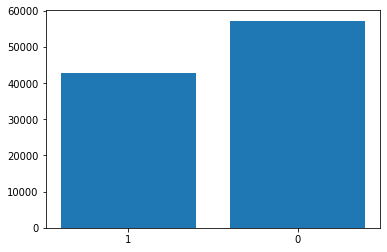

In [ ]:
#Bar plot the ratio between target variables
plt.bar(['1','0'],df['Survived'].value_counts(ascending=True))

In [ ]:
#check the imbalance ratio between 1 and 0
# this way of printing is called "f printing, the 4f is to display until 4 decimal places"
ratio = len(df[df['Survived']==1])/len(df[df['Survived']==0])

print(ratio)

0.7474574494111068


#### Split training and test data
- I use `train_test_split()` method in scikit-learn package
- I split my training and test set by keeping ratio of **target** categorical variable.
- This is called *stratified split*, and it can be easily done by passing `stratify` arugment to the `train_test_split()` method.

In [ ]:
#import train_test_split method from sklearn
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(df,test_size = 0.2, random_state=1,stratify = df[['Survived']])

In [ ]:
TR_Length = len(training_set)
TE_Length = len(test_set)

print(f'Training samples : {TR_Length},Test Samples: {TE_Length}')

Training samples : 80000,Test Samples: 20000


In [ ]:
training_set['Survived'].value_counts()

0    45781
1    34219
Name: Survived, dtype: int64

In [ ]:
ratio = len(training_set[training_set['Survived'] == 1])/len(training_set[training_set['Survived'] == 0])
print(f'Ratio of target in training set 0 : 1 = 1 : {ratio:.4f}')

Ratio of target in training set 0 : 1 = 1 : 0.7474


In [ ]:
ratio = len(test_set[test_set['Survived'] == 1])/len(test_set[test_set['Survived'] == 0])
print(f'Ratio of target in test set 0 : 1 = 1 : {ratio:.4f}')

Ratio of target in test set 0 : 1 = 1 : 0.7475


## Exploratory data analysis (20 points)

In [ ]:
# copy data for preventing damage in raw training data
data = training_set.copy()

* I looked at the categorical values ​​of sex and pclass.
  - Let us see their relationship with target variables using multiple bar chart.
  - It can be easily done by combining `plot()` function of matplotlib package and `crosstab()` function of pandas package.
  - According to the hypothesis, I looked at survival rates by gender and by Pclass.

* The bar graph showed that unlike the hypothesis, the survival rate of men was low and that of women was high.
* It is presumed that this is probably because they tried to save women first. 


<function matplotlib.pyplot.show>

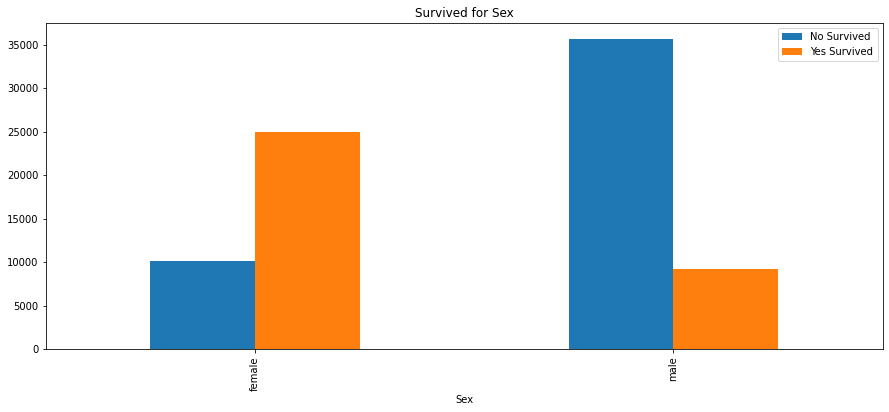

In [ ]:
pd.crosstab(data['Sex'],data['Survived']).plot(kind = 'bar',figsize = (15,6))
plt.title('Survived for Sex')
plt.legend(['No Survived ','Yes Survived'])
plt.show

* As in the hypothesis, the better the pclass, the higher the survival rate was.
* It is predicted that the survival rate will be high as the higher class seats are in a safe position from sinking.



<function matplotlib.pyplot.show>

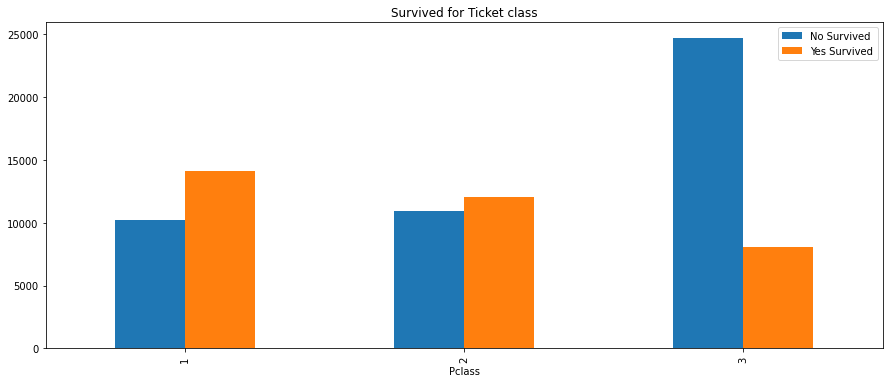

In [ ]:
pd.crosstab(data['Pclass'],data['Survived']).plot(kind = 'bar',figsize = (15,6))
plt.title('Survived for Ticket class')
plt.legend(['No Survived ','Yes Survived'])
plt.show

* I can also check relationship between two numeric variables along with target label using histogram. It shows the distribution of age according to survival.
 - When viewed simply by histogram, the survival rate is low in the early 20s and late 50s, and the survival rate is high in the late teens. 

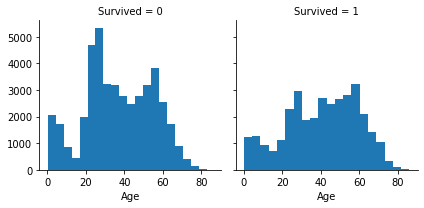

In [ ]:
age_survived = sns.FacetGrid(data, col='Survived')
age_survived.map(plt.hist, 'Age', bins=20)

* To make the relationship between age and survival easier to see, I also plotted using Facetgrid.
 - If you look at this graph, you can clearly see that the survival rate is low among young people in their 20s and 30s, and the survival rate increases from their 40s.
 - From these points, it can be predicted that the old and the weak were prioritized during rescue activities.

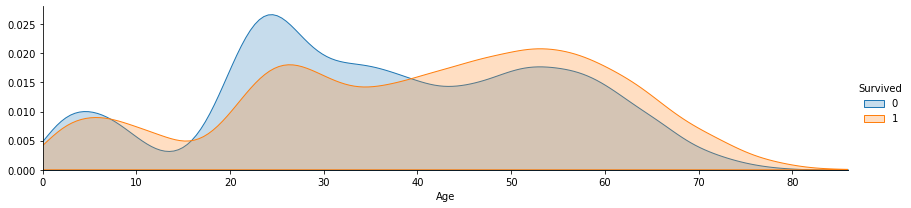

In [ ]:
Age_survived = sns.FacetGrid(data,hue="Survived",aspect=4)
Age_survived.map(sns.kdeplot,'Age',shade=True)
Age_survived.set(xlim=(0,data['Age'].max()))
Age_survived.add_legend()

plt.show()

##Correctness of the process of data munging and data pre-processing

* Check for missing values ​​in training_set and test_set.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   PassengerId  100000 non-null  object 
 1   Survived     100000 non-null  object 
 2   Pclass       100000 non-null  object 
 3   Name         100000 non-null  object 
 4   Sex          100000 non-null  object 
 5   Age          96708 non-null   float64
 6   SibSp        100000 non-null  int64  
 7   Parch        100000 non-null  int64  
 8   Ticket       95377 non-null   object 
 9   Fare         99866 non-null   float64
 10  Cabin        32134 non-null   object 
 11  Embarked     99750 non-null   object 
dtypes: float64(2), int64(2), object(8)
memory usage: 9.2+ MB


* The missing values ​​were checked first.

In [ ]:
training_set.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age             2662
SibSp              0
Parch              0
Ticket          3723
Fare             107
Cabin          54212
Embarked         206
dtype: int64

In [ ]:
test_set.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

* Age will put the missing values ​​as the median and Fare will do so as well. Embarked will fill in the mode.
* Age has a large number of missing values, so the median is put in so that it does not have an overall effect.
* Fare did not care much because there were few missing values, and Embarked put in the mode value assuming that it came mainly from the place where it came from the most.


In [ ]:
training_set['Age'].fillna(training_set['Age'].median(), inplace = True)
training_set['Fare'].fillna(training_set['Fare'].median(), inplace = True)
training_set['Embarked'].fillna(training_set['Embarked'].mode()[0], inplace = True)

test_set['Age'].fillna(test_set['Age'].median(), inplace = True)
test_set['Fare'].fillna(test_set['Fare'].median(), inplace = True)
test_set['Embarked'].fillna(test_set['Embarked'].mode()[0], inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [ ]:
training_set.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket          3723
Fare               0
Cabin          54212
Embarked           0
dtype: int64

In [ ]:
test_set.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket           900
Fare               0
Cabin          13654
Embarked           0
dtype: int64

* Cabin values ​​are not expected to be used because there are many missing values ​​and are not expected to be related to survival.
* The name and ticket also don't seem to have any special relationship to survival, so I won't use it.

In [ ]:
# check head
training_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
875,875,0,3,"Mcmillon, Julia",female,63.0,0,0,209066,8.01,NaN,S
4548,4548,0,1,"Diaz, Earnest",male,20.0,0,0,441261,57.29,NaN,S
17439,17439,1,3,"Campbell, Margaret",female,57.0,0,0,NaN,8.06,NaN,S
40369,40369,1,2,"Hazel, Mary",female,58.0,0,1,24901,12.19,NaN,C
34564,34564,1,2,"Rundle, Jose",male,64.0,0,0,434348,265.80,NaN,S


* Name, ticket, and Cabin do not seem to be related to survival prediction, and Cabin was excluded because there were many missing values.

In [ ]:
drop_features = ['Name','Ticket','Cabin']
training_set = training_set.drop(drop_features, axis=1)
test_set=test_set.drop(drop_features, axis = 1)


In [ ]:
training_set.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
86046,86046,0,3,male,32.0,0.0,0.0,10.98,S
42976,42976,0,3,male,26.0,0.0,0.0,8.49,S
74917,74917,1,1,female,34.0,0.0,0.0,4.45,S
5772,5772,0,2,female,3.0,0.0,0.0,21.11,S
85386,85386,0,1,male,56.0,0.0,0.0,169.18,C


##### Encode cateogrical feature
- Convert categorical feature represented in string format into numerical representation.
- Use `OneHotEncoder` for nominal features, and `OrdinalEncoder` for ordinal features.


In [ ]:
nom_feat = ['Sex','Embarked']
ord_feat = ['Pclass']
num_feat = ['Age','SibSp','Parch','Fare']


In [ ]:
data = training_set.copy()
#data=data[nom_feat].dropna(axis=0)


X_train = data.loc[:,['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

X_train=X_train.dropna(axis=0)
print(X_train)
y_train = data.loc[:,['Survived']]
y_train=y_train.astype('int')


      Pclass     Sex   Age  SibSp  Parch    Fare Embarked
875        3  female  63.0      0      0    8.01        S
4548       1    male  20.0      0      0   57.29        S
17439      3  female  57.0      0      0    8.06        S
40369      2  female  58.0      0      1   12.19        C
34564      2    male  64.0      0      0  265.80        S
...      ...     ...   ...    ...    ...     ...      ...
69131      3    male  33.0      0      0   37.24        S
84810      1  female  49.0      1      0  339.98        S
89419      3    male  27.0      0      0   25.92        S
73806      1  female  33.0      0      0   66.52        Q
22083      1    male  25.0      1      0   75.17        S

[80000 rows x 7 columns]


In [ ]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

In [ ]:
ohe = OneHotEncoder(sparse=False)
oe = OrdinalEncoder()

ohe.fit(X_train[nom_feat].values) #only fit training data
oe.fit(X_train[ord_feat].values)

X_train_nom = ohe.transform(X_train[nom_feat].values)
X_train_ord = oe.transform(X_train[ord_feat].values)


In [ ]:
X_train_nom.shape,X_train_ord.shape

((80000, 5), (80000, 1))

In [ ]:
X_train_nom

array([[1., 0., 0., 0., 1.],
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 1.],
       [1., 0., 0., 1., 0.],
       [0., 1., 0., 0., 1.]])

In [ ]:
X_train_ord

array([[2.],
       [0.],
       [2.],
       ...,
       [2.],
       [0.],
       [0.]])

In [ ]:
from sklearn.preprocessing import StandardScaler


scalar = StandardScaler()
scalar.fit(X_train[num_feat].values)
X_train_num = scalar.transform(X_train[num_feat].values)

In [ ]:
X_train_num.shape

(80000, 4)

In [ ]:
X_train = np.concatenate([X_train_num, X_train_ord, X_train_nom], axis=1)
X_train.shape


(80000, 10)

In [ ]:
X_train

array([[ 1.36721658, -0.46207663, -0.47620118, ...,  0.        ,
         0.        ,  1.        ],
       [-1.02135901, -0.46207663, -0.47620118, ...,  0.        ,
         0.        ,  1.        ],
       [ 1.03392696, -0.46207663, -0.47620118, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.63252113, -0.46207663, -0.47620118, ...,  0.        ,
         0.        ,  1.        ],
       [-0.29923151, -0.46207663, -0.47620118, ...,  0.        ,
         1.        ,  0.        ],
       [-0.74361767,  0.70034375, -0.47620118, ...,  0.        ,
         0.        ,  1.        ]])

##Usage of appropriate models (15 points) 
###Use at least three different models for the task


* Here, I used logistic regression, decision tree, linear svc, and random forest for classification. (4 models are used)
* After fitting the model, I compared the performance between the models by printing the score indicating the accuracy.
* Only the random forest is unusually high at 0.99, and the other three models look similar at 0.76.

In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
print('Score: {}'.format(log_reg.score(X_train, y_train)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score: 0.767225


In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=13)
tree_clf.fit(X_train, y_train)
print('Score: {}'.format(tree_clf.score(X_train, y_train)))

Score: 0.764325


In [ ]:
from sklearn.svm import LinearSVC
svc_clf = LinearSVC()
svc_clf.fit(X_train, y_train)
print('Score: {}'.format(svc_clf.score(X_train, y_train)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Score: 0.7671125


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train, y_train)
print('Score: {}'.format(rf_clf.score(X_train, y_train)))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


Score: 0.993775


##Usage of appropriate evaluation measures with useful visualizations (20 points) 
###(e.g., ROC curve, k-fold CV result with an error bar, etc.)

In [ ]:
data = test_set.copy()
#data=data[nom_feat].dropna(axis=0)


X_test = data.loc[:,['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

X_test=X_test.dropna(axis=0)
print(X_test)
y_test = data.loc[:,['Survived']]
y_test=y_test.astype('int')


      Pclass     Sex   Age  SibSp  Parch   Fare Embarked
25548      3    male   1.0      1      1  29.85        S
28709      1  female  64.0      0      0  78.65        C
73922      3    male  38.0      0      0  11.94        S
36958      1    male  46.0      3      2  78.25        S
59718      3    male  23.0      0      0   8.56        S
...      ...     ...   ...    ...    ...    ...      ...
15778      3  female  63.0      0      0  31.36        C
58454      3    male  35.0      0      1  10.81        S
21480      3    male  34.0      0      0  10.65        S
25554      2    male  71.0      0      0  10.29        C
39273      2  female  16.0      0      1  11.47        C

[20000 rows x 7 columns]


In [ ]:
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder

In [ ]:
ohe = OneHotEncoder(sparse=False)
oe = OrdinalEncoder()

ohe.fit(X_test[nom_feat].values) 
oe.fit(X_test[ord_feat].values)

X_test_nom = ohe.transform(X_test[nom_feat].values)
X_test_ord = oe.transform(X_test[ord_feat].values)

In [ ]:
X_test_nom.shape,X_test_ord.shape

((20000, 5), (20000, 1))

In [ ]:
from sklearn.preprocessing import StandardScaler


scalar = StandardScaler()
scalar.fit(X_test[num_feat].values)
X_test_num = scalar.transform(X_test[num_feat].values)

In [ ]:
X_test_num.shape

(20000, 4)

In [ ]:
X_test = np.concatenate([X_test_num, X_test_ord, X_test_nom], axis=1)
X_test.shape

(20000, 10)

## ROC curve, k-fold CV result with an error bar


* I made a prediction using the test data and calculated how accurate it is by comparing it with the correct answer as accuracy_score.
* The accuracy of the model was similar at about 0.76 except for the random forest was 0.72.

In [ ]:
from sklearn.metrics import accuracy_score

log_pred = log_reg.predict(X_test)
print('LogisticRegression accuracy: {0:.4f}'.format(accuracy_score(y_test, log_pred)))

tree_pred = tree_clf.predict(X_test)
print('DecisionTreeClassifier accuracy: {0:.4f}'.format(accuracy_score(y_test, tree_pred)))

svc_pred = svc_clf.predict(X_test)
print('SupportVectorMachine accuracy: {0:.4f}'.format(accuracy_score(y_test, svc_pred)))

rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier accuracy:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))



LogisticRegression accuracy: 0.7649
DecisionTreeClassifier accuracy: 0.7613
SupportVectorMachine accuracy: 0.7645
RandomForestClassifier accuracy:0.7204


* I did cross validation to find out more accurately.By using 5 folds, the accuracy on small data is improved.
* The average accuracy of the models was calculated. Except for the random forest 0.72, the rest of the models came out similar to 0.76.

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(log_reg, X_train,y_train, cv=5)
scores_1 = cross_val_score(tree_clf, X_train,y_train, cv=5)
scores_2 = cross_val_score(svc_clf, X_train,y_train, cv=5)
scores_3 = cross_val_score(rf_clf, X_train,y_train, cv=5)
'''
for iter_count,accuracy in enumerate(scores):
    print("cross validation {0} accuracy: {1:.4f}".format(iter_count, accuracy))
print("mean accuracy of {0}: {1:.4f}".format(,np.mean(scores)))    
for iter_count,accuracy in enumerate(scores_1):
    print("cross validation {0} accuracy: {1:.4f}".format(iter_count, accuracy))
for iter_count,accuracy in enumerate(scores_2):
    print("cross validation {0} accuracy: {1:.4f}".format(iter_count, accuracy))
for iter_count,accuracy in enumerate(scores_3):
    print("cross validation {0} accuracy: {1:.4f}".format(iter_count, accuracy))
'''
 
print("mean accuracy of {0}: {1:.4f}".format('LogisticRegression',np.mean(scores)))
print("mean accuracy of {0}: {1:.4f}".format('DecisionTreeClassifier',np.mean(scores_1)))
print("mean accuracy of {0}: {1:.4f}".format('SupportVectorMachine',np.mean(scores_2)))
print("mean accuracy of {0}: {1:.4f}".format('RandomForestClassifier',np.mean(scores_3)))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

mean accuracy of LogisticRegression: 0.7672
mean accuracy of DecisionTreeClassifier: 0.7643
mean accuracy of SupportVectorMachine: 0.7668
mean accuracy of RandomForestClassifier: 0.7272


In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, precision_recall_fscore_support,roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

y_pred_test = log_reg.predict(X_test)
y_proba_test = log_reg.predict_proba(X_test)[:, 1]

y_pred_test_1 = tree_clf.predict(X_test)
y_proba_test_1 = tree_clf.predict_proba(X_test)[:, 1]

y_pred_test_2 = svc_clf.predict(X_test)
Y=svc_clf.decision_function(X_test)
y_proba_test_2 = (Y-Y.min()) / (Y.max()-Y.min())

y_pred_test_3 = rf_clf.predict(X_test)
y_proba_test_3 = rf_clf.predict_proba(X_test)[:, 1]


* False positive rate (FPR) and true positive rate (TPR) mean values ​​displayed on the x and y axes of the ROC curve, respectively.
* The closer the roc curve is to the top left (wider area), the better the classifier.

In [ ]:
from sklearn.metrics import auc, roc_curve

fpr, tpr, threshold = roc_curve(y_test, y_proba_test)
rocauc = auc(fpr, tpr)

fpr_1, tpr_1, threshold_1 = roc_curve(y_test, y_proba_test_1)
rocauc_1 = auc(fpr_1, tpr_1)

fpr_2, tpr_2, threshold_2 = roc_curve(y_test, y_proba_test_2)
rocauc_2 = auc(fpr_2, tpr_2)

fpr_3, tpr_3, threshold_3 = roc_curve(y_test, y_proba_test_3)
rocauc_3 = auc(fpr_3, tpr_3)

* Here, logistic regression was the best classifier with area = 0.8249, followed by linear svc (area = 0.8243), decision tree (area = 0.8214), and random forest (area = 0.7919).

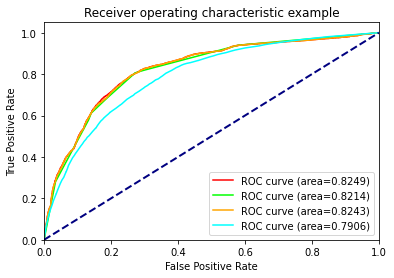

In [ ]:
plt.figure()
plt.plot(fpr, tpr,color = 'red',label=f'ROC curve (area={rocauc:.4f})')
plt.plot(fpr_1,tpr_1,color = 'lime',label=f'ROC curve (area={rocauc_1:.4f})')
plt.plot(fpr_2,tpr_2,color = 'orange',label=f'ROC curve (area={rocauc_2:.4f})')
plt.plot(fpr_3,tpr_3,color = 'aqua',label=f'ROC curve (area={rocauc_3:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

##Thorough post-analysis of results (including implications) (25points)
### What insights were you able to gain from this data?

* In real data, there are so many missing values ​​(especially Cabin here) that we need to reasonably infer the missing values.
* The decision to boldly erase data not considered to be related to survival and to fill in missing values ​​with the mode or median was also important.
* Through EDA, I found that the relationship between sex and survival rate was different from the hypothesis, and the Pclass was like the hypothesis.
* The relationship between age and survival rate could not be easily defined, but the survival rate was lower in the younger group, which made it slightly different from the hypothesis.
* As a result, I can see that healthy men did not run away to live first, but tried to save women and elderly children first. And it was also known that the rooms were in a more favorable position for the higher classes to survive.
* These factors seemed to have a definite impact on survival. So, in order to increase the survival rate, I thought it would be better to prioritize a room in a good location (a room with a high PClass) to an elderly woman.

* Family-related factors were removed to confirm the hypothesis that only gender, age, and Pclass (Fare) were related to survival prediction.
* Then, the following model evaluation process was performed after removing the family element to check whether the family element really had no significant effect on survival.

* 
Data generation to make a model using only Sex, Age, Fare, and Pclass except for SibSp and Parch.

In [ ]:
data = training_set.copy()

nom_feat_1 = ['Sex']
num_feat_1 = ['Age','Fare']
ord_feat = ['Pclass']
#data=data[nom_feat].dropna(axis=0)

X_train = data.loc[:,['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]

X_train=X_train.dropna(axis=0)
y_train = data.loc[:,['Survived']]
y_train=y_train.astype('int')

ohe = OneHotEncoder(sparse=False)
oe = OrdinalEncoder()

ohe.fit(X_train[nom_feat_1].values) #only fit training data
oe.fit(X_train[ord_feat].values)

X_train_nom_1 = ohe.transform(X_train[nom_feat_1].values)
X_train_ord_1 = oe.transform(X_train[ord_feat].values)

scalar = StandardScaler()
scalar.fit(X_train[num_feat_1].values)
X_train_num_1 = scalar.transform(X_train[num_feat_1].values)

X_train_1 = np.concatenate([X_train_num_1, X_train_ord_1, X_train_nom_1], axis=1)
X_train_1.shape
print(X_train_1)


[[ 1.36721658 -0.51789326  2.          1.          0.        ]
 [-1.02135901  0.18976329  0.          0.          1.        ]
 [ 1.03392696 -0.51717527  2.          1.          0.        ]
 ...
 [-0.63252113 -0.26070721  2.          0.          1.        ]
 [-0.29923151  0.32230529  0.          1.          0.        ]
 [-0.74361767  0.44651854  0.          0.          1.        ]]


In [ ]:
data = test_set.copy()
nom_feat_1 = ['Sex']
num_feat_1 = ['Age','Fare']
ord_feat = ['Pclass']
#data=data[nom_feat].dropna(axis=0)

X_test = data.loc[:,['Pclass','Sex','Age','SibSp','Parch','Fare','Embarked']]
X_test=X_test.dropna(axis=0)
y_test = data.loc[:,['Survived']]
y_test=y_test.astype('int')

ohe = OneHotEncoder(sparse=False)
oe = OrdinalEncoder()

ohe.fit(X_test[nom_feat_1].values) #only fit training data
oe.fit(X_test[ord_feat].values)

X_test_nom_1 = ohe.transform(X_test[nom_feat_1].values)
X_test_ord_1 = oe.transform(X_test[ord_feat].values)

scalar = StandardScaler()
scalar.fit(X_test[num_feat_1].values)
X_test_num_1 = scalar.transform(X_test[num_feat_1].values)

X_test_1 = np.concatenate([X_test_num_1, X_test_ord_1, X_test_nom_1], axis=1)
X_test_1.shape
print(X_test_1)


[[-2.06964377 -0.1932292   2.          0.          1.        ]
 [ 1.42263481  0.51229261  0.          1.          0.        ]
 [-0.01862302 -0.45216149  2.          0.          1.        ]
 ...
 [-0.24035499 -0.47081155  2.          0.          1.        ]
 [ 1.81066576 -0.47601622  1.          0.          1.        ]
 [-1.23814887 -0.45895647  1.          1.          0.        ]]


In [ ]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train_1, y_train)


from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=3, random_state=13)
tree_clf.fit(X_train_1, y_train)


from sklearn.svm import LinearSVC
svc_clf = LinearSVC()
svc_clf.fit(X_train_1, y_train)


from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100)
rf_clf.fit(X_train_1, y_train)

print('Score: {}'.format(log_reg.score(X_train_1, y_train)))
print('Score: {}'.format(tree_clf.score(X_train_1, y_train)))
print('Score: {}'.format(svc_clf.score(X_train_1, y_train)))
print('Score: {}'.format(rf_clf.score(X_train_1, y_train)))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Score: 0.7582
Score: 0.7581
Score: 0.7583
Score: 0.9861625


* Except for the random forest 0.72, the accuracy was 0.76, but the random forest decreased to 0.68 and the rest to 0.75

In [ ]:
log_pred = log_reg.predict(X_test_1)
tree_pred = tree_clf.predict(X_test_1)
svc_pred = svc_clf.predict(X_test_1)
rf_pred = rf_clf.predict(X_test_1)

print('LogisticRegression accuracy: {0:.4f}'.format(accuracy_score(y_test, log_pred)))
print('DecisionTreeClassifier accuracy: {0:.4f}'.format(accuracy_score(y_test, tree_pred)))
print('SupportVectorMachine accuracy: {0:.4f}'.format(accuracy_score(y_test, svc_pred)))
print('RandomForestClassifier accuracy:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

LogisticRegression accuracy: 0.7571
DecisionTreeClassifier accuracy: 0.7572
SupportVectorMachine accuracy: 0.7572
RandomForestClassifier accuracy:0.6895


* The Roc curve was also a random forest (area = 0.79) and the remaining area = 0.82, which decreased to 0.76 and 0.81, respectively.
* Contrary to the hypothesis, factors related to the number of family members had a significant effect on survival prediction.
* Seeing this, I thought that if there were family members, the ability to survive by protecting the members increased.

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report, precision_recall_fscore_support,roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

y_pred_test = log_reg.predict(X_test_1)
y_proba_test = log_reg.predict_proba(X_test_1)[:, 1]

y_pred_test_1 = tree_clf.predict(X_test_1)
y_proba_test_1 = tree_clf.predict_proba(X_test_1)[:, 1]

y_pred_test_2 = svc_clf.predict(X_test_1)
Y=svc_clf.decision_function(X_test_1)
y_proba_test_2 = (Y-Y.min()) / (Y.max()-Y.min())

y_pred_test_3 = rf_clf.predict(X_test_1)
y_proba_test_3 = rf_clf.predict_proba(X_test_1)[:, 1]

from sklearn.metrics import auc, roc_curve

fpr, tpr, threshold = roc_curve(y_test, y_proba_test)
rocauc = auc(fpr, tpr)

fpr_1, tpr_1, threshold_1 = roc_curve(y_test, y_proba_test_1)
rocauc_1 = auc(fpr_1, tpr_1)

fpr_2, tpr_2, threshold_2 = roc_curve(y_test, y_proba_test_2)
rocauc_2 = auc(fpr_2, tpr_2)

fpr_3, tpr_3, threshold_3 = roc_curve(y_test, y_proba_test_3)
rocauc_3 = auc(fpr_3, tpr_3)

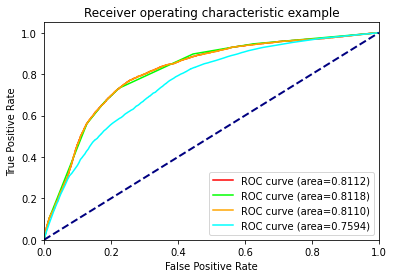

In [ ]:
plt.figure()
plt.plot(fpr, tpr,color = 'red',label=f'ROC curve (area={rocauc:.4f})')
plt.plot(fpr_1,tpr_1,color = 'lime',label=f'ROC curve (area={rocauc_1:.4f})')
plt.plot(fpr_2, tpr_2,color = 'orange',label=f'ROC curve (area={rocauc_2:.4f})')
plt.plot(fpr_3,tpr_3,color = 'aqua',label=f'ROC curve (area={rocauc_3:.4f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()